In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data= pd.read_csv('C:/Users/LENOVO/Downloads/COVID19-Probability-Symptoms-Checker-master111/COVID19-Probability-Symptoms-Checker-master/COVID-19/covid_final_data.csv')
print(data.shape)
print(list(data.columns))

(1495, 16)
['AGE', 'GENDER', 'FEVER', 'COUGH', 'FATIGUE', 'PAINS', 'NASAL_CONGESTION', 'SHORTNESS_OF_BREATH', 'RUNNY_NOSE', 'SORE THROAT', 'DIARRHEA', 'CHILLS', 'HEADACHE', 'VOMITING', 'LIVES_IN_AFFECTED_AREA', 'COVID_OUTPUT']


In [3]:
data.head()

,AGE,GENDER,FEVER,COUGH,FATIGUE,PAINS,NASAL_CONGESTION,SHORTNESS_OF_BREATH,RUNNY_NOSE,SORE THROAT,DIARRHEA,CHILLS,HEADACHE,VOMITING,LIVES_IN_AFFECTED_AREA,COVID_OUTPUT
0,19,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1
1,28,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1
2,35,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
3,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [4]:
data['COVID_OUTPUT'].value_counts()


1    757
0    738
Name: COVID_OUTPUT, dtype: int64

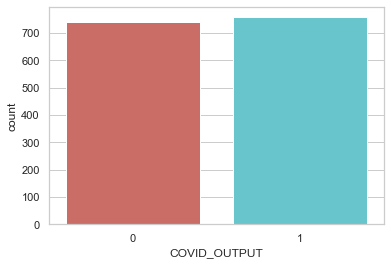

In [5]:
sns.countplot(x='COVID_OUTPUT',data=data,palette='hls')
plt.show()

In [6]:
 count_no_sub = len(data[data['COVID_OUTPUT']==0])
count_sub = len(data[data['COVID_OUTPUT']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of negative", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of positive", pct_of_sub*100)

percentage of negative 49.36454849498328
percentage of positive 50.635451505016725


In [7]:
data.groupby('COVID_OUTPUT').mean()

,AGE,GENDER,FEVER,COUGH,FATIGUE,PAINS,NASAL_CONGESTION,SHORTNESS_OF_BREATH,RUNNY_NOSE,SORE THROAT,DIARRHEA,CHILLS,HEADACHE,VOMITING,LIVES_IN_AFFECTED_AREA
COVID_OUTPUT,,,,,,,,,,,,,,,
0,50.411924,0.560976,0.230352,0.207317,0.028455,0.023035,0.023035,0.040650,0.042005,0.097561,0.014905,0.031165,0.260163,0.035230,0.247967
1,50.638045,0.574637,0.759577,0.409511,0.056803,0.043593,0.052840,0.047556,0.047556,0.092470,0.027741,0.036988,0.060766,0.014531,0.544254


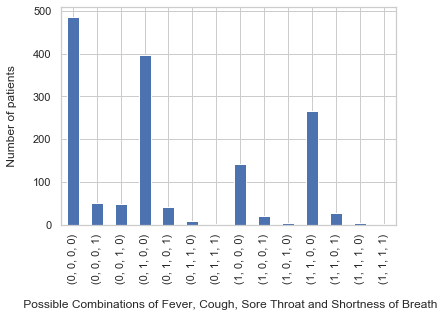

In [8]:
plt.clf()
plt.rcParams["figure.figsize"] = [15,5]
data.groupby(['COUGH','FEVER','SHORTNESS_OF_BREATH','SORE THROAT']).size().plot(kind='bar')
plt.xlabel("\n Possible Combinations of Fever, Cough, Sore Throat and Shortness of Breath")
plt.ylabel(" Number of patients \n")
plt.show()

In [9]:
X = data.loc[:, data.columns != 'COVID_OUTPUT']
y = data.loc[:, data.columns == 'COVID_OUTPUT']
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['COVID_OUTPUT'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no positives in oversampled data",len(os_data_y[os_data_y['COVID_OUTPUT']==0]))
print("Number of subscription",len(os_data_y[os_data_y['COVID_OUTPUT']==1]))
print("Proportion of negative in oversampled data is ",len(os_data_y[os_data_y['COVID_OUTPUT']==0])/len(os_data_X))
print("Proportion of positives data in oversampled data is ",len(os_data_y[os_data_y['COVID_OUTPUT']==1])/len(os_data_X))


length of oversampled data is  1072
Number of no subscription in oversampled data 536
Number of subscription 536
Proportion of negative in oversampled data is  0.5
Proportion of positives data in oversampled data is  0.5


In [10]:
data_vars=data.columns.values.tolist()
y=['COVID_OUTPUT']
X=[i for i in data_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
cols=['AGE', 'GENDER', 'FEVER', 'COUGH', 'FATIGUE', 'PAINS', 'NASAL_CONGESTION', 'SHORTNESS_OF_BREATH', 'RUNNY_NOSE', 'SORE THROAT', 'DIARRHEA', 'CHILLS', 'HEADACHE', 'VOMITING', 'LIVES_IN_AFFECTED_AREA'] 
X=os_data_X[cols]
y=os_data_y['COVID_OUTPUT']

In [12]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.453109
         Iterations 6
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.346      
Dependent Variable:   COVID_OUTPUT      AIC:               1001.4651  
Date:                 2021-01-21 19:15  BIC:               1076.1243  
No. Observations:     1072              Log-Likelihood:    -485.73    
Df Model:             14                LL-Null:           -743.05    
Df Residuals:         1057              LLR p-value:       7.2869e-101
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
AGE                    -0.0289   0.0030 -9.7060 0.0000 -0.0347 -0.0231
GEN

In [13]:
cols=['AGE', 'GENDER', 'FEVER', 'COUGH', 'FATIGUE', 'PAINS', 'NASAL_CONGESTION', 'SHORTNESS_OF_BREATH', 'RUNNY_NOSE', 'SORE THROAT', 'DIARRHEA', 'CHILLS', 'HEADACHE', 'VOMITING', 'LIVES_IN_AFFECTED_AREA'] 
X=os_data_X[cols]
y=os_data_y['COVID_OUTPUT']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.453109
         Iterations 6
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.346      
Dependent Variable:   COVID_OUTPUT      AIC:               1001.4651  
Date:                 2021-01-21 19:15  BIC:               1076.1243  
No. Observations:     1072              Log-Likelihood:    -485.73    
Df Model:             14                LL-Null:           -743.05    
Df Residuals:         1057              LLR p-value:       7.2869e-101
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
AGE                    -0.0289   0.0030 -9.7060 0.0000 -0.0347 -0.0231
GEN

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [15]:
#Accuracy of logistic regression classifier on test set

In [16]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [17]:
#confusion Matrix

[[124  35]
 [ 32 131]]


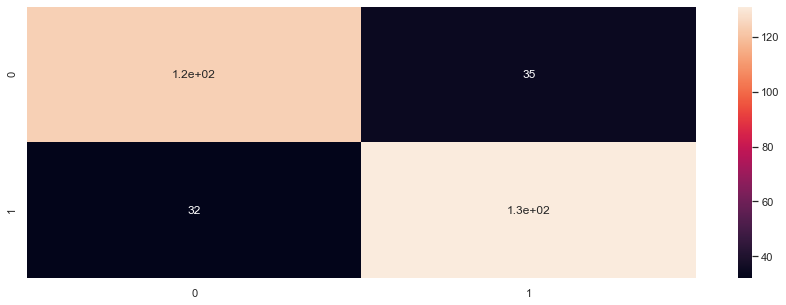

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [19]:
#precision, recall, F-measure and support

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       159
           1       0.79      0.80      0.80       163

    accuracy                           0.79       322
   macro avg       0.79      0.79      0.79       322
weighted avg       0.79      0.79      0.79       322



In [21]:
#ROC Curve

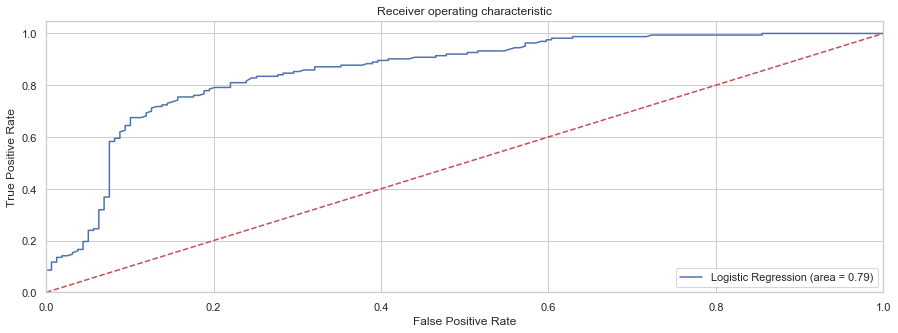

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
